In [1]:
import sys
import os

# Add the src folder to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), 'src')))

import numpy as np
import matplotlib.pyplot as plt

from mesh import *
from geometry import *
import material
import cross_section
import beam_element
import structure
import solver

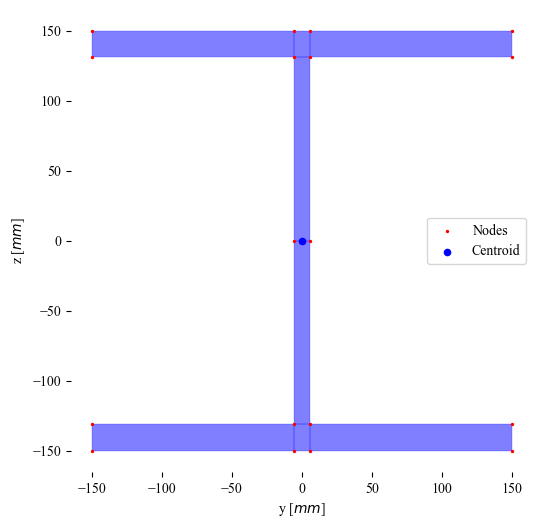

In [2]:
HEB_300 = H_beam(web_width     =  11.0,
                 web_height    = 262.0,
                 flange_width  = 300.0,
                 flange_height =  19.0)
beam = Mesh(HEB_300, mesh_type="quadrilateral", mesh_size=100)
beam.plot()


In [3]:
struc_3 = structure.Cantilever(beam   = beam, 
						length = 1000, 
						number_of_sections_per_elemnt = 3)
struc_4 = structure.Cantilever(beam   = beam, 
						length = 1000, 
						number_of_sections_per_elemnt = 4)
struc_6 = structure.Cantilever(beam   = beam, 
						length = 1000, 
						number_of_sections_per_elemnt = 6)
struc_10 = structure.Cantilever(beam   = beam, 
						length = 1000, 
						number_of_sections_per_elemnt = 10)

In [4]:
non_linear_solver_3 = solver.Nonlinear(struc_3, 
									 constraint="Load", 
									 NR_tolerance=1e-6, 
									 NR_max_iter=10, 
									 section_tolerance=1e-6, 
									 section_max_iter=100)
non_linear_solver_4 = solver.Nonlinear(struc_4, 
									 constraint="Load", 
									 NR_tolerance=1e-6, 
									 NR_max_iter=10, 
									 section_tolerance=1e-6, 
									 section_max_iter=100)
non_linear_solver_6 = solver.Nonlinear(struc_6, 
									 constraint="Load", 
									 NR_tolerance=1e-6, 
									 NR_max_iter=10, 
									 section_tolerance=1e-6, 
									 section_max_iter=100)
non_linear_solver_10 = solver.Nonlinear(struc_10, 
									 constraint="Load", 
									 NR_tolerance=1e-6, 
									 NR_max_iter=10, 
									 section_tolerance=1e-6, 
									 section_max_iter=100)

In [5]:
increments = np.zeros(1100)
increments.fill(500)

from contextlib import redirect_stdout
with open(os.devnull, 'w') as f, redirect_stdout(f):
	u_history_3 , lambda_history_3  = non_linear_solver_3.solve(increments)
	u_history_4 , lambda_history_4  = non_linear_solver_4.solve(increments)
	u_history_6 , lambda_history_6  = non_linear_solver_6.solve(increments)
	u_history_10, lambda_history_10 = non_linear_solver_10.solve(increments)

  0%|          | 0/1100 [00:00<?, ?it/s]

  0%|          | 0/1100 [00:00<?, ?it/s]

  0%|          | 0/1100 [00:00<?, ?it/s]

  0%|          | 0/1100 [00:00<?, ?it/s]

(-1.0, 21.0)

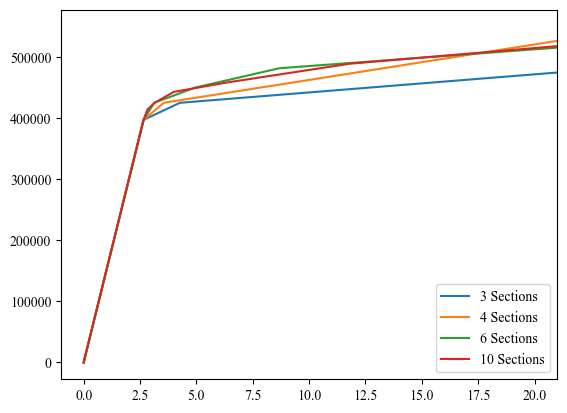

In [6]:
plt.plot(u_history_3[:,6+2], lambda_history_3, label="3 Sections")
plt.plot(u_history_4[:,6+2], lambda_history_4, label="4 Sections")
plt.plot(u_history_6[:,6+2], lambda_history_6, label="6 Sections")
plt.plot(u_history_10[:,6+2], lambda_history_10, label="10 Sections")
plt.legend()
plt.xlim(-1,21)